(discr_distr_notebook)=
# Distribuzioni di v.c. discrete

In questo capitolo esploreremo le distribuzioni di probabilità discrete, che sono fondamentali per la comprensione dei fenomeni aleatori con un numero finito o numerabile di esiti.

Ogni distribuzione di probabilità può essere parametrizzata specificando dei parametri che permettono di controllare certi aspetti della distribuzione per raggiungere un obiettivo specifico.

Inizieremo con la distribuzione Bernoulliana, che rappresenta esperimenti con due possibili esiti: "successo" o "insuccesso". Questi esperimenti costituiscono il nucleo di ciò che è definito un processo Bernoulliano. Il parametro della distribuzione Bernoulliana è la probabilità di successo in ciascuna prova.

Quando tali prove Bernoulliane vengono ripetute per un numero fisso di volte $n$, il conteggio totale dei successi segue una distribuzione binomiale. Anche la distribuzione binomiale dipende da un parametro, la probabilità di successo in ciascuna singola prova. Questa distribuzione nasce dalla somma di prove Bernoulliane indipendenti, quando il numero totale di prove $n$ è stabilito in anticipo.

Se, invece, il numero stesso di prove diventa una variabile casuale, la distribuzione dei successi all'interno di questa serie di prove segue la distribuzione di Poisson. Questa distribuzione è particolarmente adatta a modellare eventi che avvengono raramente o su intervalli variabili. La distribuzione di Poisson dipende da un unico parametro: il tasso medio di successo per unità di tempo o spazio.

Se la probabilità di successo in una serie di prove Bernoulliane non è costante, ma varia seguendo una distribuzione Beta, il numero di successi osservati in $N$ prove non seguirà più la distribuzione binomiale, ma seguirà invece la distribuzione Beta-Binomiale. Questa distribuzione offre una rappresentazione più flessibile e aderente alla realtà in alcuni contesti.

Infine, esamineremo la distribuzione uniforme discreta, dove ogni evento all'interno di un determinato intervallo finito ha la stessa probabilità di verificarsi. Questa distribuzione è particolarmente utile quando non esistono motivi per privilegiare un risultato rispetto a un altro. La distribuzione uniforme è molto specifica e non dipende da alcun parametro: una volta stabilito il supporto della distribuzione, c'è un unico modo per assegnare le probabilità agli eventi.

In sintesi, attraverso queste distribuzioni, possiamo modellare e analizzare matematicamente una vasta gamma di situazioni reali, fornendo strumenti utili per comprendere e prevedere fenomeni aleatori.

## Preparazione del Notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
from scipy.integrate import quad
import arviz as az
import warnings

# Ignora i warning di tipo UserWarning
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
# set seed to make the results fully reproducible
seed: int = sum(map(ord, "discr_rv_distr"))
rng: np.random.Generator = np.random.default_rng(seed=seed)
az.style.use("arviz-darkgrid")
%config InlineBackend.figure_format = "retina"

## Distribuzione Bernoulliana

In statistica, un esperimento che presenta soltanto due esiti possibili viene modellato attraverso ciò che è noto come "prova Bernoulliana". Un esempio classico è il lancio di una moneta, che può risultare in testa o croce.

```{admonition} Definizione
Una variabile casuale $Y$ che assume valori in $\{0, 1\}$ è definita come variabile di Bernoulli. La sua distribuzione di probabilità è descritta come segue:

$$
P(Y \mid \theta) =
  \begin{cases}
    \theta     & \text{se $Y = 1$ (successo)}, \\
    1 - \theta & \text{se $Y = 0$ (insuccesso)},
  \end{cases}
$$

dove $0 \leq \theta \leq 1$. Il parametro $\theta$ rappresenta la probabilità dell'evento "successo" ($Y = 1$), mentre $1 - \theta$ quella dell'evento "insuccesso" ($Y = 0$).
```

Nella distribuzione Bernoulliana, la probabilità di osservare l'esito 1 è $\theta$, mentre quella di osservare 0 è $1 - \theta$. Questa distribuzione viene utilizzata per modellare situazioni in cui esistono due sole possibili risposte, come un "sì" o un "no", un "successo" o un "insuccesso".

Calcolando il valore atteso e la varianza, otteniamo:

$$
\begin{align}
\mathbb{E}(Y) &= 0 \cdot P(Y=0) + 1 \cdot P(Y=1) = \theta, \\
\mathbb{V}(Y) &= (0 - \theta)^2 \cdot P(Y=0) + (1 - \theta)^2 \cdot P(Y=1) = \theta(1-\theta).
\end{align}
$$ (eq-ev-var-bern)


Esplicitando ulteriormente la formula della varianza con $P(Y=0) = 1 - \theta$ e $P(Y=1) = \theta$, abbiamo:

$$ \mathbb{V}(Y) = (0 - \theta)^2 \cdot (1 - \theta) + (1 - \theta)^2 \cdot \theta $$

Calcoliamo ora le singole parti dell'espressione:
1. $ (0 - \theta)^2 = \theta^2 $
2. $ (1 - \theta)^2 = 1 - 2\theta + \theta^2 $

Sostituendo queste espressioni nell'equazione della varianza, otteniamo:

$$ \mathbb{V}(Y) = \theta^2 \cdot (1 - \theta) + (1 - 2\theta + \theta^2) \cdot \theta $$

$$ \mathbb{V}(Y) = \theta^2 - \theta^3 + \theta - 2\theta^2 + \theta^3 $$

Semplificando:

$$ \mathbb{V}(Y) = \theta - \theta^2 $$

$$ \mathbb{V}(Y) = \theta(1-\theta) $$

Quindi, l'equazione iniziale mostra come la varianza di una variabile casuale binaria $Y$, che segue una distribuzione di Bernoulli con parametro $\theta$, sia espressa come $\theta(1-\theta)$. Questo rispecchia il fatto che la varianza di una distribuzione di Bernoulli raggiunge il suo massimo quando $\theta = 0.5$, indicando la massima incertezza (o variabilità) quando la probabilità di successo è uguale a quella di fallimento.

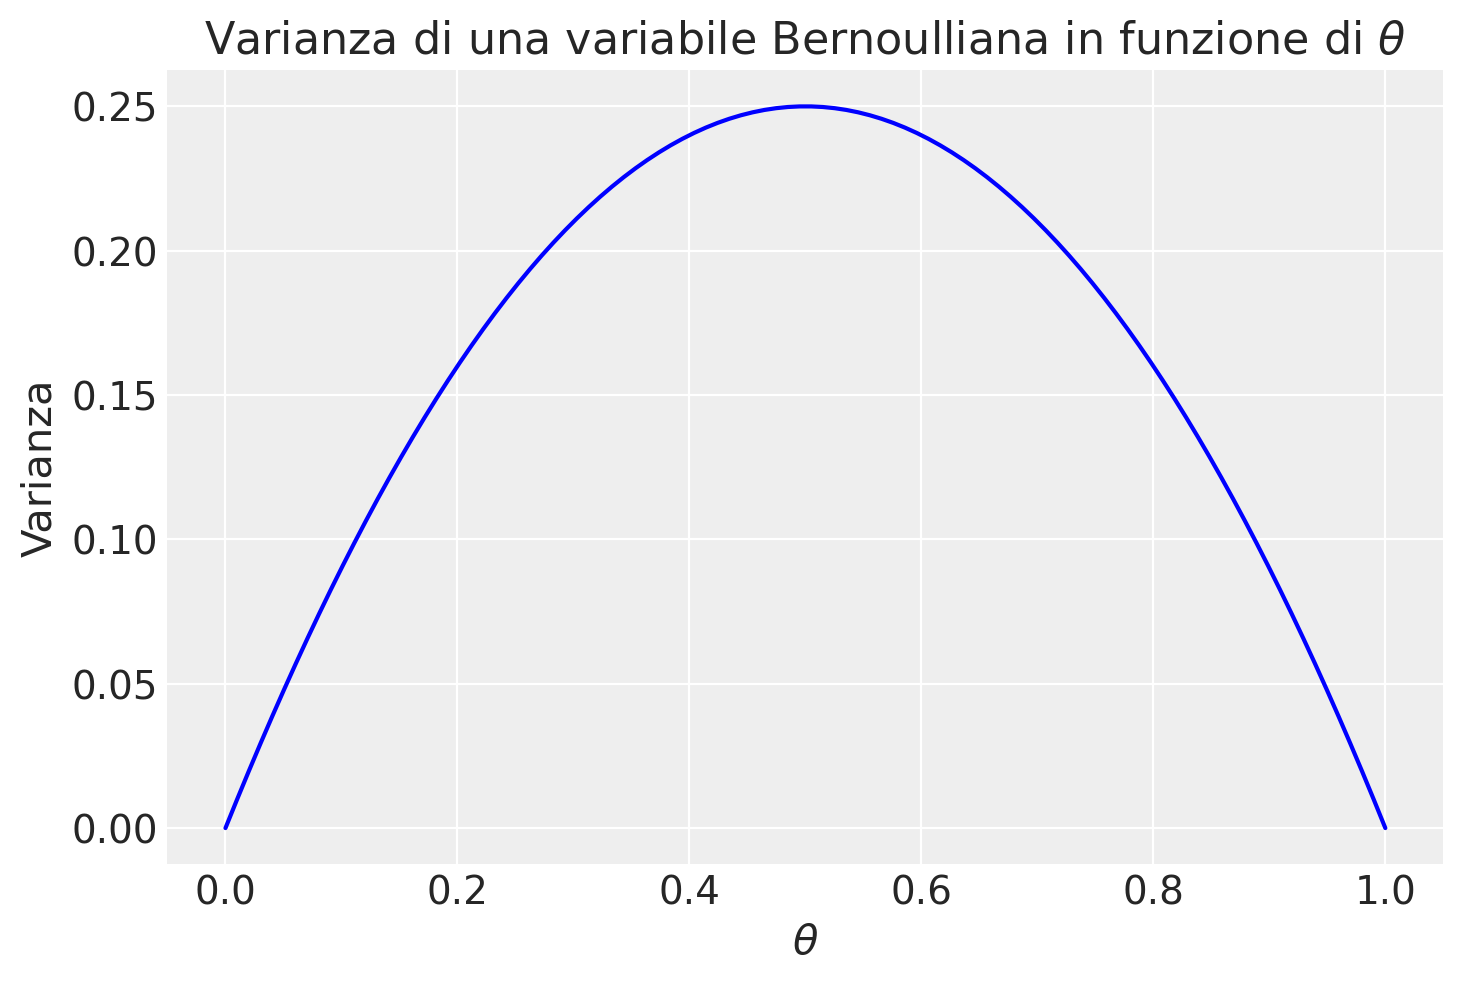

In [3]:
# Define theta values between 0 and 1
theta = np.linspace(0, 1, 100)

# Variance of a Bernoulli distribution is theta(1-theta)
variance = theta * (1 - theta)

plt.plot(theta, variance, label='Varianza', color='blue')
plt.title('Varianza di una variabile Bernoulliana in funzione di $\\theta$')
plt.xlabel('$\\theta$')
plt.ylabel('Varianza')
plt.show()

Utilizziamo la notazione $Y \sim Bernoulli(\theta)$ per indicare che la variabile casuale $Y$ segue una distribuzione Bernoulliana di parametro $\theta$.

Ad esempio, nel caso del lancio di una moneta equilibrata, la variabile di Bernoulli assume i valori $0$ e $1$ con uguale probabilità di $\frac{1}{2}$. Pertanto, la funzione di massa di probabilità assegna una probabilità di $\frac{1}{2}$ sia per $Y = 0$ che per $Y = 1$, mentre la funzione di distribuzione cumulativa risulta essere $\frac{1}{2}$ per $Y = 0$ e $1$ per $Y = 1$.

## Distribuzione Binomiale

La distribuzione binomiale è una distribuzione di probabilità discreta fondamentale, che si concentra sul conteggio del numero di successi in una serie di prove Bernoulliane indipendenti. Queste prove sono caratterizzate dal fatto che ogni evento ha solo due possibili esiti: "successo" o "insuccesso", con una probabilità di successo costante denotata da $\theta$.

```{admonition} Definizione
La distribuzione binomiale quantifica la probabilità di osservare esattamente $y$ successi in $n$ tentativi indipendenti di Bernoulli:

$$
P(Y=y) = \binom{n}{y} \theta^{y} (1-\theta)^{n-y} = \frac{n!}{y!(n-y)!} \theta^{y} (1-\theta)^{n-y},
$$ (eq-binomialdistribution)

Qui, $\binom{n}{y}$, noto come coefficiente binomiale, rappresenta il numero di combinazioni possibili per ottenere $y$ successi in $n$ prove, mentre $\theta$ è la probabilità costante di successo per ogni prova.
```

La distribuzione binomiale è spesso illustrata con esempi come il lancio di una moneta o l'estrazione da un'urna. Ad esempio, nel caso del lancio ripetuto di una moneta, questa distribuzione descrive la probabilità di ottenere un numero specifico di teste in un certo numero di lanci, con ciascun lancio che segue una distribuzione di Bernoulli con probabilità di successo $\theta$.

Un aspetto interessante della distribuzione binomiale è la sua proprietà di riproducibilità: se due variabili casuali indipendenti, $y_1$ e $y_2$, seguono distribuzioni binomiali con lo stesso parametro $\theta$, ma con diversi numeri di prove ($N_1$ e $N_2$), allora la loro somma, $y = y_1 + y_2$, sarà anch'essa distribuita binomialmente, con parametri $N_1 + N_2$ e $\theta$.

### Calcolo delle Probabilità

Per approfondire il calcolo delle probabilità in questa distribuzione, esaminiamo una serie di prove Bernoulliane. Consideriamo una serie di $n$ prove che risultano in $y$ successi:

$$
\overbrace{SS\dots S}^\text{$y$ volte} \overbrace{II\dots I}^\text{$n-y$ volte}
$$

Ogni sequenza con $y$ successi specifici ha una probabilità di $\theta^y \cdot (1-\theta)^{n-y}$. Tuttavia, siamo interessati alla probabilità complessiva di osservare qualsiasi sequenza con $y$ successi, che si ottiene moltiplicando la probabilità di una sequenza singola per il numero totale di sequenze possibili, dato dal coefficiente binomiale $\binom{n}{y}$.

In questo modo, la distribuzione binomiale diventa uno strumento statistico per analizzare fenomeni che presentano esiti binari, con prove che sono indipendenti e identicamente distribuite. Questa distribuzione trova applicazione in una moltitudine di scenari, dalla valutazione del numero di successi in una serie di tentativi, come i lanci di moneta, fino a sondaggi di opinione e altro ancora. 

### Applicazioni Pratiche della Distribuzione Binomiale

Consideriamo un esempio pratico per illustrare l'applicazione della distribuzione binomiale. Supponiamo di osservare 2 successi in 4 prove Bernoulliane, dove la probabilità di successo in ogni prova è $\theta = 0.2$. La probabilità di ottenere questo risultato specifico è calcolata utilizzando l'eq. {eq}`eq-binomialdistribution`:

$$
P(Y=2) = \frac{4!}{2!(4-2)!} \cdot 0.2^{2} \cdot (1-0.2)^{4-2} = 0.1536.
$$

Questo calcolo può essere replicato in Python. Utilizzando il modulo `math`, possiamo calcolare direttamente:

In [6]:
n = 4
theta = 0.2
y = 2

prob = math.comb(n, y) * theta**y * (1 - theta) ** (n - y)
print(prob)

0.15360000000000007


In alternativa, possiamo sfruttare la libreria SciPy per eseguire calcoli analoghi. SciPy offre una vasta gamma di funzioni per la gestione delle distribuzioni statistiche, tra cui la distribuzione binomiale.

In [7]:
stats.binom.pmf(y, n, theta)

0.15359999999999993

Utilizzando `scipy.stats.binom.pmf(y, n, p)`, possiamo trovare le probabilità per ogni possibile valore $y$ in una distribuzione binomiale di parametri $n = 4$ e $\theta = 0.2$:

In [8]:
y = np.arange(0, n + 1)
print(y)

[0 1 2 3 4]


In [9]:
probabilities = stats.binom.pmf(y, n, theta)
print(*probabilities)

0.40959999999999985 0.4096 0.15359999999999993 0.02559999999999999 0.0016000000000000003


Visualizziamo la distribuzione di massa di probabilità:

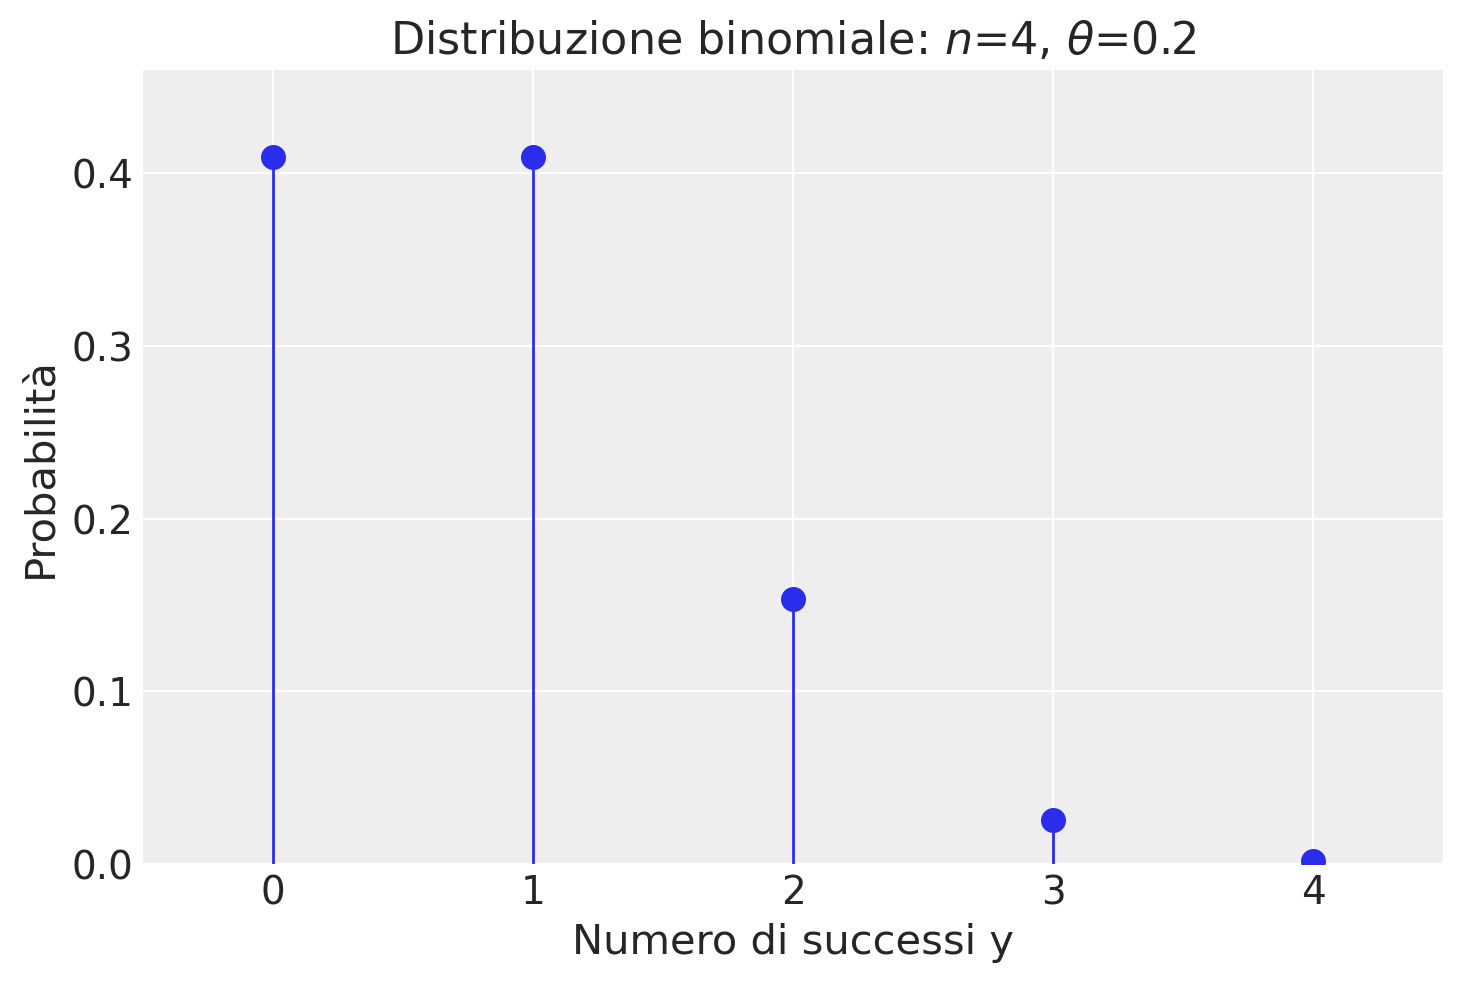

In [10]:
plt.figure()
plt.plot(y, probabilities, "o", ms=8)
plt.vlines(y, 0, probabilities, linestyles="-", lw=1)
plt.title(f"Distribuzione binomiale: $n$={n}, $\\theta$={theta}")
plt.xlabel("Numero di successi y")
plt.ylabel("Probabilità")
plt.xlim(-0.5, n + 0.5)
plt.ylim(0, max(probabilities) + 0.05)
plt.show()

Per esplorare ulteriormente, consideriamo la distribuzione di probabilità di diverse distribuzioni binomiali per due valori di $n$ e $\theta$. La seguente visualizzazione mostra come cambia la distribuzione al variare di $\theta$:

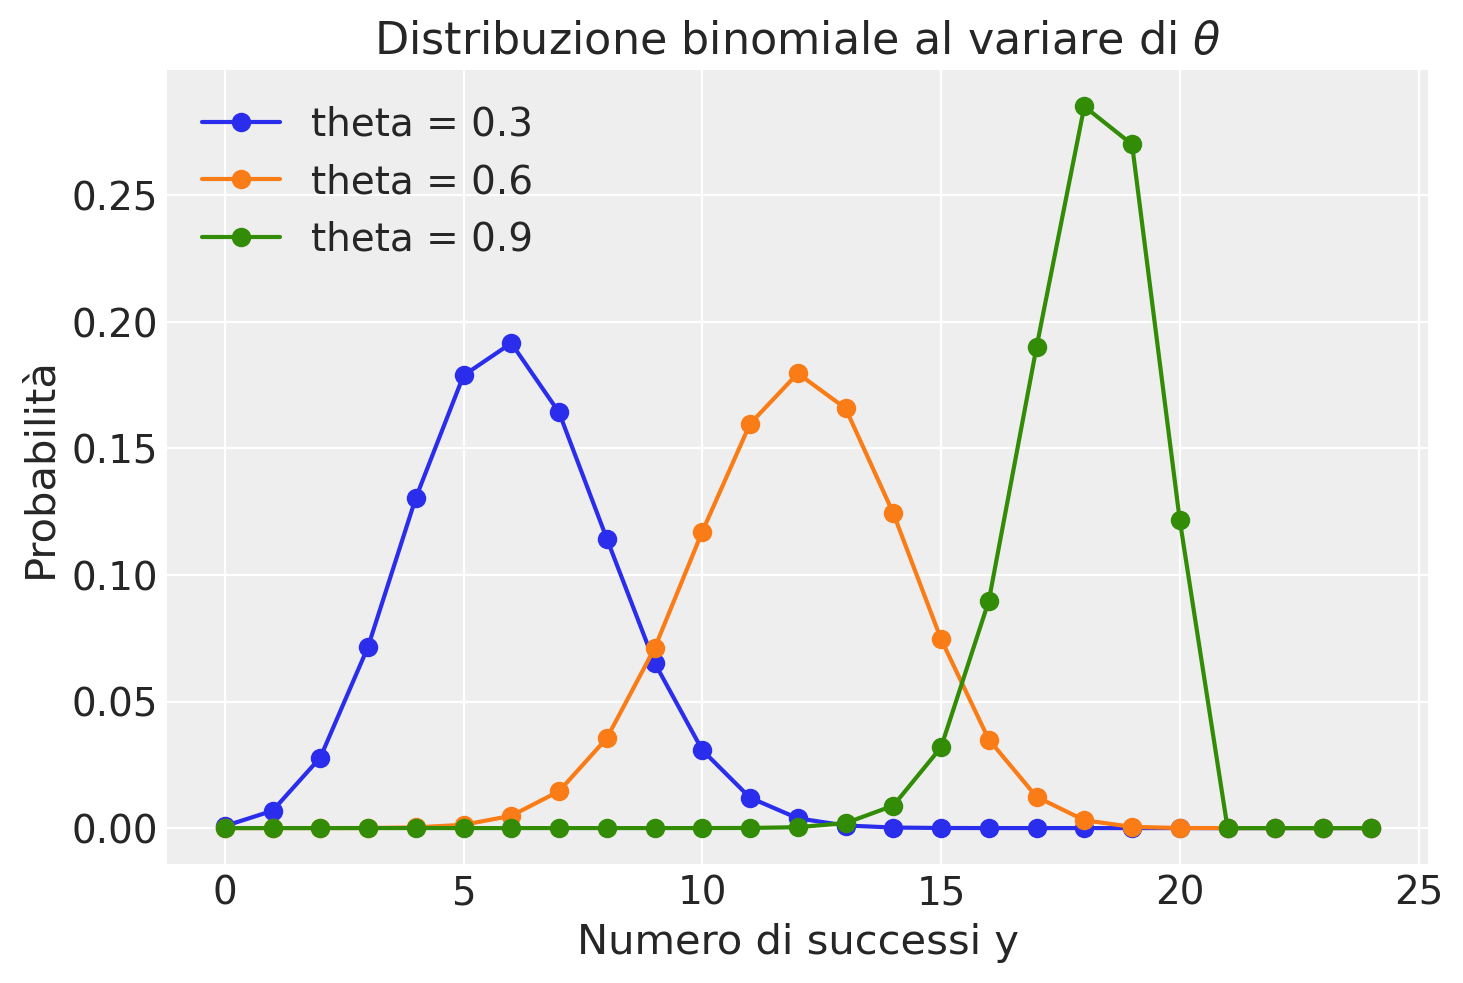

In [11]:
plt.figure()

for theta in np.arange(0.3, 1.0, 0.3):
    y = np.arange(0, 25)
    binom_dist = stats.binom.pmf(y, 20, theta)
    plt.plot(y, binom_dist, "-o", label=f"theta = {theta:.1f}")

plt.xlabel("Numero di successi y")
plt.ylabel("Probabilità")
plt.title("Distribuzione binomiale al variare di $\\theta$")
plt.legend()
plt.show()

Un'altra proprietà interessante della distribuzione binomiale è la sua riproducibilità. Se abbiamo due variabili casuali indipendenti che seguono distribuzioni binomiali con lo stesso parametro $\theta$ ma con diversi numeri di prove, la loro somma seguirà anch'essa una distribuzione binomiale. Questo può essere dimostrato analiticamente o sperimentato empiricamente.

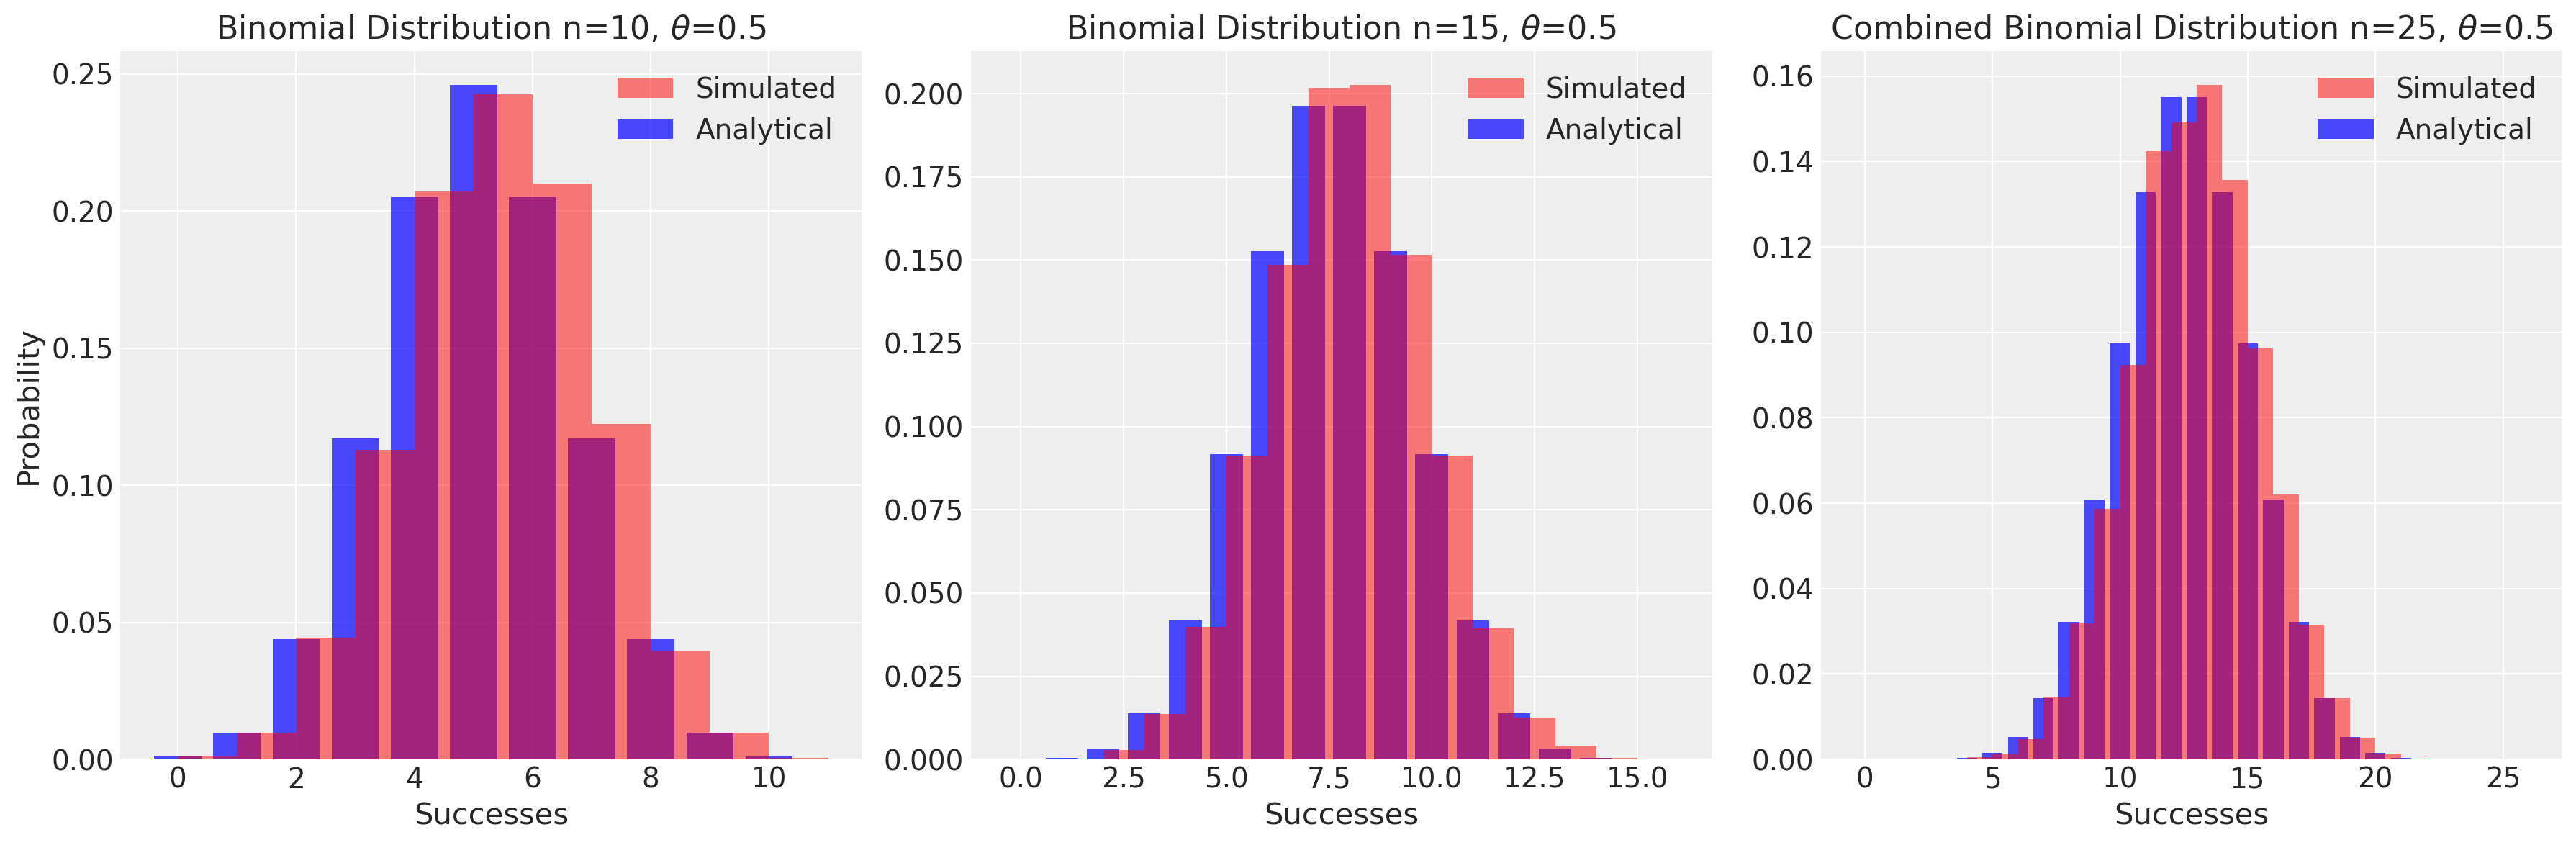

In [3]:
# Parameters
n1, n2 = 10, 15  # Number of trials
theta = 0.5  # Success probability

# Analytical binomial distributions
x1 = np.arange(0, n1+1)
y1 = stats.binom.pmf(x1, n1, theta)
x2 = np.arange(0, n2+1)
y2 = stats.binom.pmf(x2, n2, theta)

# Combined analytical distribution
x_combined = np.arange(0, n1+n2+1)
y_combined = stats.binom.pmf(x_combined, n1+n2, theta)

# Simulated distributions
simulated1 = rng.binomial(n1, theta, 10000)
simulated2 = rng.binomial(n2, theta, 10000)
simulated_combined = simulated1 + simulated2

# Plotting
plt.figure(figsize=(18, 6))

# Plot 1: Binomial 1
plt.subplot(1, 3, 1)
plt.bar(x1, y1, color='blue', alpha=0.7, label='Analytical')
plt.hist(simulated1, bins=range(n1+2), density=True, alpha=0.5, color='red', label='Simulated')
plt.title(f'Binomial Distribution n={n1}, $\\theta$={theta}')
plt.xlabel('Successes')
plt.ylabel('Probability')
plt.legend()

# Plot 2: Binomial 2
plt.subplot(1, 3, 2)
plt.bar(x2, y2, color='blue', alpha=0.7, label='Analytical')
plt.hist(simulated2, bins=range(n2+2), density=True, alpha=0.5, color='red', label='Simulated')
plt.title(f'Binomial Distribution n={n2}, $\\theta$={theta}')
plt.xlabel('Successes')
plt.legend()

# Plot 3: Combined Binomial
plt.subplot(1, 3, 3)
plt.bar(x_combined, y_combined, color='blue', alpha=0.7, label='Analytical')
plt.hist(simulated_combined, bins=range(n1+n2+2), density=True, alpha=0.5, color='red', label='Simulated')
plt.title(f'Combined Binomial Distribution n={n1+n2}, $\\theta$={theta}')
plt.xlabel('Successes')
plt.legend()

plt.tight_layout()
plt.show()

Consideriamo un altro esempio. Lanciando $5$ volte una moneta onesta, qual è la probabilità che esca testa almeno due volte? Troviamo la soluzione usando `stats.binom.pmf()`.

In [21]:
stats.binom.pmf(2, n=5, p=0.5) + stats.binom.pmf(3, n=5, p=0.5) + stats.binom.pmf(4, n=5, p=0.5) +  stats.binom.pmf(5, n=5, p=0.5)

0.8125

In [22]:
np.sum([stats.binom.pmf(k, n=5, p=0.5) for k in range(2, 6)])

0.8125

Più facilmente, si trova la risposta usando la funzione di ripartizione `stats.binom.cdf`.

In [23]:
1 - stats.binom.cdf(1, n=5, p=0.5) 

0.8125

Rappresentiamo graficamente la funzione di ripartizione per una Binomiale di ordine $n$ = 5 e $\theta$ = 0.5.

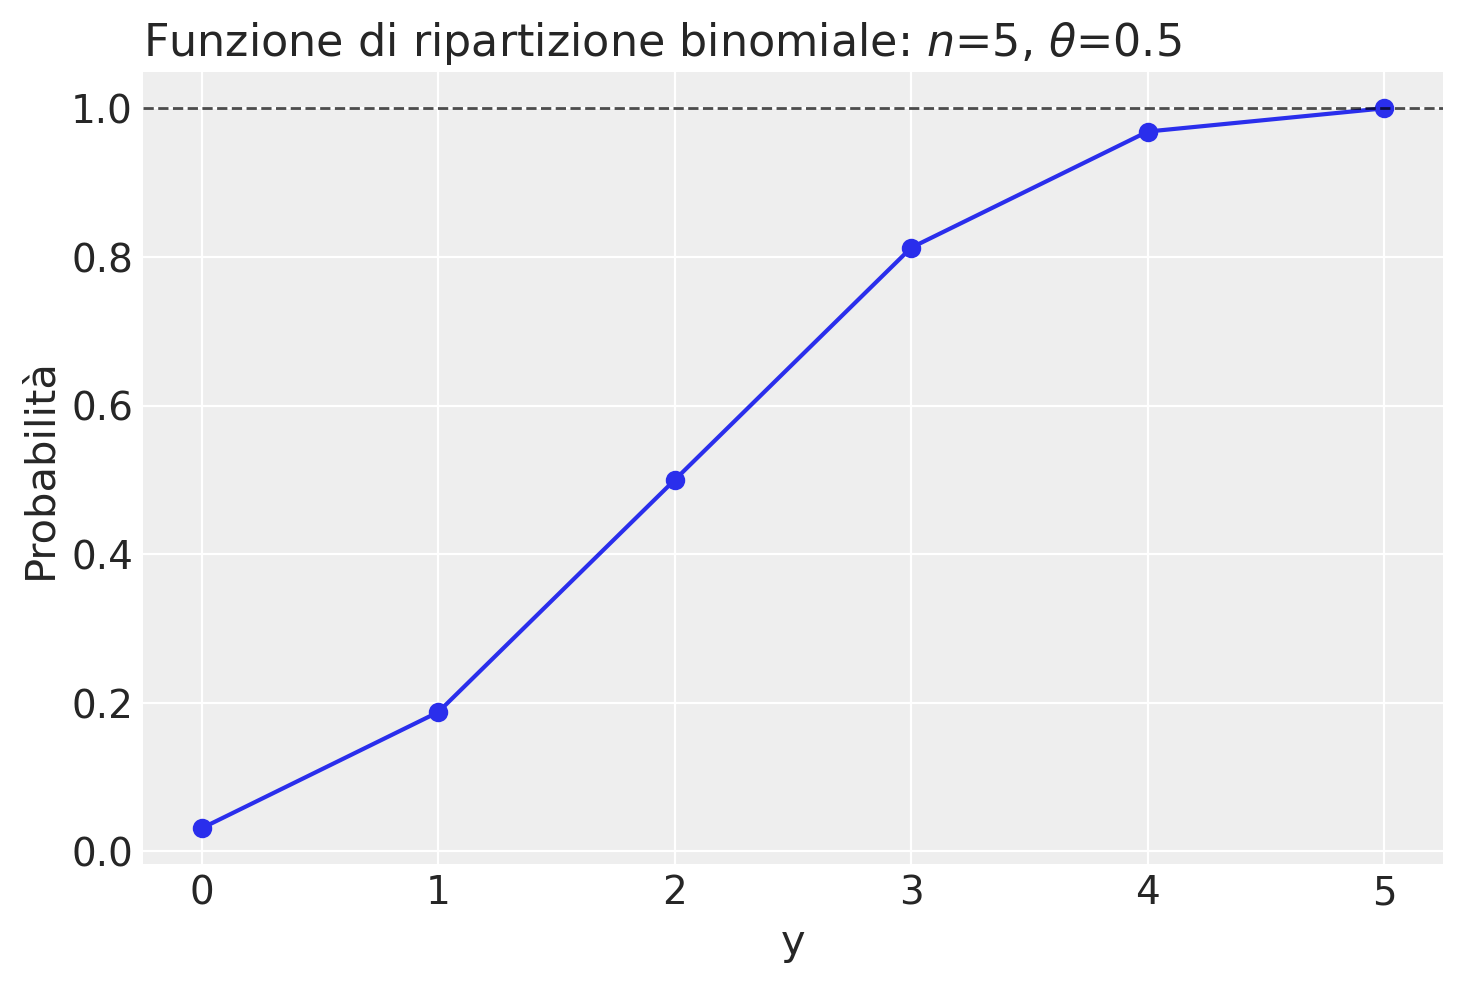

In [13]:
n = 5
theta = 0.5
y = np.arange(0, n+1)

plt.figure()
plt.plot(y, stats.binom.cdf(y, n=n, p=theta))
plt.scatter(y, stats.binom.cdf(y, n=n, p=theta))
plt.axhline(1, color="k", alpha=0.7, linestyle="--", lw=1)
plt.title(f"Funzione di ripartizione binomiale: $n$={n}, $\\theta$={theta}", loc="left")
plt.xlabel("y")
_ = plt.ylabel("Probabilità")

Un'altra funzione utile è quella che trova il numero di successi in una distribuzione binomiale che corrisponde ad una data probabilità (nella coda sinistra della funzione ripartizione). Per l'esempio presente:

In [32]:
target_probability = 1 - 0.8125
stats.binom.ppf(target_probability, n, theta)

1.0

Utilizzando la funzione punto percentuale (PPF), che è l'inverso della funzione di distribuzione cumulativa (CDF), possiamo trovare il numero di successi corrispondente alla probabilità target di $1 - 0.8125 = 0.1875$ in una distribuzione binomiale con parametri $n = 5$ e $\theta = 0.5$. Il risultato mostra che il numero di successi cercato per questa probabilità target è 1.

Facciamo un altro esempio. Consideriamo la probabilità cumulativa $P(Y \leq 4)$ per una variabile casuale $Y$ che segue una distribuzione binomiale con numero di prove $n = 10$ e probabilità di successo $\theta = 0.2$. La funzione `stats.binom.cdf(4, n=10, p=0.2)` calcola la probabilità che ci siano al massimo 4 successi in 10 tentativi, dove la probabilità di successo in ogni tentativo è del 20%.

In [34]:
target_probability = stats.binom.cdf(4, n=10, p=0.2)
target_probability

0.9672065024

Di conseguenza, la funzione inversa è:

In [35]:
stats.binom.ppf(target_probability, n=10, p=0.2)

4.0

Per generare una sequenza di valori casuali seguendo una distribuzione binomiale possiamo utilizzare la funzione `random()` di NumPy. Dopo aver inizializzato `rng = np.random.default_rng(RANDOM_SEED)`, per esempio, 

In [ ]:
rng = np.random.default_rng(42)

possiamo impiegare `rng` per generare valori casuali da una distribuzione binomiale: 

In [4]:
x = rng.binomial(p=.5, n=5, size=30)
print(*x)

3 5 1 2 3 2 3 3 3 1 2 4 2 3 0 2 2 2 3 3 4 4 2 0 4 2 2 1 3 2


Per una discussione sulla generazione di numeri pseudo-casuali in Python, si veda il capitolo {ref}`appendix-rng`.

### Valore atteso e deviazione standard

La media (numero atteso di successi in $n$ prove) e la deviazione standard di una distribuzione binomiale si trovano nel modo seguente:

$$
\begin{align}
\mu    &= n\theta,  \notag \\
\sigma &= \sqrt{n\theta(1-\theta)}.
\end{align}
$$ (eq-mean-var-binomial)

```{admonition} Dimostrazione
Essendo $Y$ la somma di $n$ prove Bernoulliane indipendenti $Y_i$, è facile vedere che

$$
\begin{align}
\mathbb{E}(Y) &= \mathbb{E}\left( \sum_{i=1}^n Y_i \right) = \sum_{i=1}^n \mathbb{E}(Y_i) = n\theta, \\
\mathbb{V}(Y) &= \mathbb{V} \left( \sum_{i=1}^n Y_i \right) = \sum_{i=1}^n \mathbb{V}(Y_i) = n \theta (1-\theta).
\end{align}
$$
```

Per esempio, prendiamo in considerazione il caso di un esperimento in cui vengono lanciate quattro monete, ciascuna con una probabilità di ottenere testa (successo) pari a $\theta = 0.2$. Calcoliamo il valore atteso e la varianza per questo esperimento.

Il valore atteso, $\mu$, rappresenta il numero medio di teste che ci aspettiamo di ottenere in ciascun lancio. Per la distribuzione binomiale, questo è dato da $\mu = n \theta$, dove $n$ è il numero di prove (lanci di monete). Nel nostro caso, con $n = 4$ e $\theta = 0.2$, abbiamo:

$$
\mu = n \theta = 4 \times 0.2 = 0.8.
$$

Questo significa che, in media, ci aspettiamo di ottenere circa 0.8 teste per ogni serie di quattro lanci.

Per quanto riguarda la varianza, che misura quanto i risultati individuali tendono a differire dalla media, nella distribuzione binomiale è calcolata come $n \theta (1-\theta)$. Pertanto, per il nostro esperimento:

$$
\text{Varianza} = n \theta (1-\theta) = 4 \times 0.2 \times (1 - 0.2) = 0.64.
$$

La varianza di 0.64 suggerisce una certa dispersione intorno al valore medio di 0.8 teste.

Per confermare queste aspettative teoriche, possiamo eseguire una simulazione. Creiamo una serie di esperimenti simulati in cui lanciamo quattro monete per un gran numero di volte, registrando il numero di teste ottenute in ogni serie. Calcoliamo poi la media e la varianza dei risultati ottenuti per vedere quanto si avvicinano ai valori teorici calcolati.

In [8]:
x = rng.binomial(p=.2, n=4, size=1000000)

In [9]:
np.mean(x)

0.79956

In [10]:
np.var(x, ddof=0)

0.6397598064000003

### Funzioni Python associate alle distribuzioni di probabilità

| Tipo                              | Esempio: Binomiale (y &#124; n, θ)     | Esempio: Normale (y &#124; μ, σ)       |
|:----------------------------------|:---------------------------------------|:---------------------------------------|
| Funzione di verosimiglianza       | `binom.pmf(y, n, θ)`                   | `norm.pdf(y, μ, σ)`                    |
| Prob Y=y                          | `binom.pmf(y, n, θ)`                   | sempre 0                               |
| Prob Y ≥ y, Y ≤ y, y1 < Y < y2    | `binom.cdf(y, n, θ)` o `binom.sf(y, n, θ)` | `norm.cdf(y, μ, σ)` o `norm.sf(y, μ, σ)` |
| Inversa della CDF                 | `binom.ppf(q, n, θ)`                   | `norm.ppf(q, μ, σ)`                    |
| Generazione di dati simulati      | `rng.binomial(p, n, size)`             | `rng.normal(μ, σ, size`                |

In seguito, utilizzeremo altre distribuzioni, come Uniforme, Beta, ecc., e ognuna di queste ha il proprio insieme di funzioni in Python trovate in `scipy.stats`. È possibile consultare queste diverse distribuzioni in opere di riferimento o documentazione online.

Si noti che `pmf` (funzione di massa di probabilità) è usato per le distribuzioni discrete come la binomiale, mentre `pdf` (funzione di densità di probabilità) è usata per le distribuzioni continue come la normale. `cdf` (funzione di distribuzione cumulativa) e `sf` (funzione di sopravvivenza, che è 1 - cdf) sono utilizzate per calcolare le probabilità cumulative. `ppf` (percent point function) è l'inverso della `cdf` e viene utilizzata per determinare il valore di variabile al di sotto del quale cade una certa percentuale delle osservazioni. `rvs` (random variates) è usata per generare dati simulati.

## Distribuzione Discreta Uniforme

La distribuzione discreta uniforme è un tipo particolare di distribuzione di probabilità, dove ogni risultato in un insieme finito e discreto $S$ ha la stessa probabilità $p$ di verificarsi. Questa distribuzione è caratterizzata dalla sua semplicità e dalla sua proprietà fondamentale di equiprobabilità.

Consideriamo un esempio pratico con una variabile casuale discreta $X$, che può assumere valori nell'insieme $\{1, 2, \dots, N\}$. Un'istanza classica di questa distribuzione si verifica quando si sceglie casualmente un numero intero tra 1 e $N$, inclusi. Se $X$ rappresenta il numero selezionato, allora la somma delle probabilità di tutti i possibili valori di $X$ deve totalizzare 1, come indicato dalla formula di normalizzazione:

$$
\sum_{i=1}^N P(X_i) = Np = 1.
$$

Di conseguenza, la probabilità che $X$ assuma un valore specifico $x$ è uniformemente distribuita:

$$
P(X = x) = \frac{1}{N},
$$

indicando che ogni evento ha la stessa probabilità di verificarsi.

Il valore atteso, o la media, di $X$ ci dà un'idea del risultato medio atteso e si calcola come:

$$
\mathbb{E}(X) = \sum_{x=1}^N x \cdot \frac{1}{N} = \frac{1}{N} \cdot \sum_{x=1}^N x.
$$

A questo punto, dobbiamo calcolare la somma $\sum_{x=1}^{N} x$, che è la somma dei primi $N$ numeri naturali. Questa somma è data dalla formula:

$$
\sum_{x=1}^{N} x = \frac{N(N + 1)}{2}.
$$

Sostituendo questa formula nel nostro calcolo del valore atteso, otteniamo:

$$
\mathbb{E}(X) = \frac{1}{N} \cdot \frac{N(N + 1)}{2} = \frac{N + 1}{2}.
$$

Quindi, abbiamo dimostrato che il valore atteso $ \mathbb{E}(X) $ per una variabile casuale $X$ che assume valori interi uniformemente distribuiti da 1 a $N$ è $\frac{N + 1}{2}$. 

Per determinare quanto i valori di $X$ si disperdono attorno al valore medio, calcoliamo la varianza. Il primo passo è calcolare $\mathbb{E}(X^2)$, il valore atteso del quadrato di $X$. Per una variabile casuale discreta uniforme, questo si ottiene moltiplicando ogni valore al quadrato per la sua probabilità (che è $1/N$ per tutti i valori) e sommando i risultati:

$$
\mathbb{E}(X^2) = \frac{1}{N} \cdot \sum_{x=1}^N x^2
$$

Usando l'identità per la somma dei quadrati dei primi $N$ numeri naturali:

$$
1^2 + 2^2 + \dots + N^2 = \frac{N(N + 1)(2N + 1)}{6}
$$

possiamo sostituirla per trovare $\mathbb{E}(X^2)$:

$$
\mathbb{E}(X^2) = \frac{1}{N} \cdot \frac{N(N + 1)(2N + 1)}{6} = \frac{(N + 1)(2N + 1)}{6}
$$

La varianza di $X$, denotata con $\mathbb{V}(X)$, si calcola usando la formula:

$$
\mathbb{V}(X) = \mathbb{E}(X^2) - [\mathbb{E}(X)]^2
$$

Abbiamo già stabilito che $\mathbb{E}(X) = \frac{N + 1}{2}$ e $\mathbb{E}(X^2) = \frac{(N + 1)(2N + 1)}{6}$. Sostituendo questi valori nella formula della varianza, otteniamo:

$$
\mathbb{V}(X) = \frac{(N + 1)(2N + 1)}{6} - \left(\frac{N + 1}{2}\right)^2
$$

Per semplicare l'espressione della varianza, dobbiamo sottrarre il quadrato di $\mathbb{E}(X)$ da $\mathbb{E}(X^2)$:

$$
\begin{align*}
\mathbb{V}(X) &= \frac{(N + 1)(2N + 1)}{6} - \left(\frac{N + 1}{2}\right)^2 \\
&= \frac{(N + 1)(2N + 1)}{6} - \frac{(N + 1)^2}{4} \\
&= \frac{2(N + 1)(2N + 1)}{12} - \frac{3(N + 1)^2}{12} \\
&= \frac{(N + 1)(2(2N + 1) - 3(N + 1))}{12} \\
&= \frac{(N + 1)(4N + 2 - 3N - 3)}{12} \\
&= \frac{(N + 1)(N - 1)}{12}
\end{align*}
$$

Quindi, la varianza $\mathbb{V}(X)$ di una variabile casuale uniforme discreta $X$ che assume valori da 1 a $N$ è $\frac{(N + 1)(N - 1)}{12}$, il che mostra come la dispersione dei valori attorno al loro valore medio dipenda dalla grandezza di $N$. Questa formula fornisce la varianza di una variabile casuale in una distribuzione discreta uniforme, offrendo una misura quantitativa della dispersione dei valori attorno al loro valore medio. 

## Distribuzione di Poisson

La distribuzione di Poisson è utilizzata per modellare il numero di eventi indipendenti che si verificano in un intervallo di tempo o spazio prefissato. La variabile casuale discreta $Y$ denota il numero di tali eventi, mentre il parametro $\lambda$ rappresenta il tasso medio di occorrenza di questi eventi in un intervallo specifico.

La funzione di massa di probabilità associata alla distribuzione di Poisson, che indica la probabilità che si verifichino esattamente $y$ eventi, è definita come segue:

$$
P(Y = y \mid \lambda) = \frac{\lambda^y \cdot e^{-\lambda}}{y!}, \quad \text{per} \quad y = 0, 1, 2, \ldots
$$ (eq-poissondistribution)

Questa equazione illustra:

- $P(Y = y \mid \lambda)$, la probabilità che esattamente $y$ eventi si verifichino.
- $\lambda$, il tasso medio di occorrenza degli eventi per l'intervallo considerato.
- $y$, il numero di eventi, che è limitato ai valori interi non negativi.

Una peculiarità della distribuzione di Poisson è che sia il valore atteso ($E[Y]$) sia la varianza ($Var[Y]$) sono equivalenti a $\lambda$. Questo significa che con l'aumentare del valore di $\lambda$, aumenta anche la dispersione dei dati attorno al valore medio, evidenziando un incremento della variabilità degli eventi.

Quale esempio, presentiamo qui sotto un grafico con la distribuzione di Poisson di parametro $\lambda$ = 2.

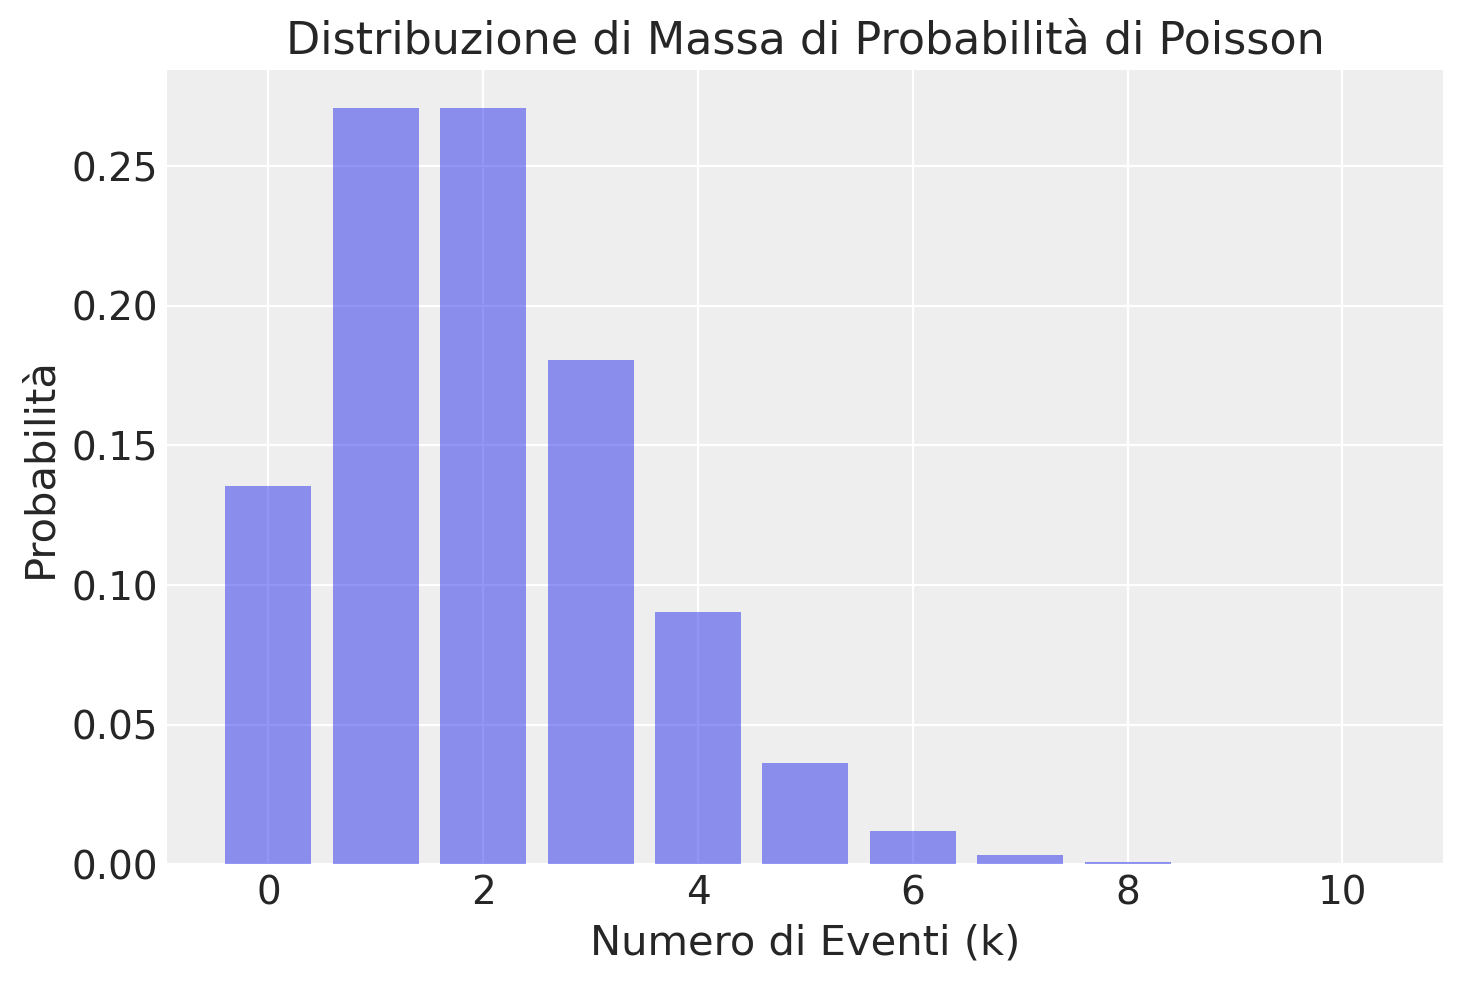

In [14]:
# Tasso medio di occorrenza di eventi
lambda_value = 2

# Creazione della distribuzione di Poisson con il tasso medio specificato
poisson_dist = stats.poisson(mu=lambda_value)

# Calcolo della probabilità di avere un certo numero di eventi
k_values = range(0, 11)  # Consideriamo valori da 0 a 10

# Calcolo delle probabilità corrispondenti
probabilities = poisson_dist.pmf(k_values)

plt.figure()

# Plot della distribuzione di massa di probabilità
plt.bar(k_values, probabilities, alpha=0.5)
plt.xlabel('Numero di Eventi (k)')
plt.ylabel('Probabilità')
plt.title('Distribuzione di Massa di Probabilità di Poisson')
plt.show()

La probabilità di ottenere un singolo valore $y$ si calcola utilizzando la funzione di massa di probabilità (`pmf`), dove l'argomento `k` rappresenta il numero di eventi ($y$) e `mu` è uguale a $\lambda$. Ad esempio, per determinare la probabilità di osservare esattamente tre eventi ($y = 3$) con un tasso di occorrenza $\lambda$ = 2, indicata come $P(Y = 3)$, si utilizza la seguente istruzione:

In [74]:
stats.poisson.pmf(k=3, mu=2)

0.18044704431548356

La probabilità di non più di 3 eventi, indicata come $P(Y \leq 3)$, si ottiene nel modo seguente:

In [75]:
p = stats.poisson.pmf(k=0, mu=2) + stats.poisson.pmf(k=1, mu=2) + stats.poisson.pmf(k=2, mu=2) + stats.poisson.pmf(k=3, mu=2)
p

0.857123460498547

La funzione `ppf`, con la probabilità e $\lambda$ come argomenti, restituisce il quantile della distribuzione di Poisson. Ad esempio, nel caso precedente, abbiamo:

In [76]:
stats.poisson.ppf(p, mu=2)

3.0

La funzione di distribuzione cumulativa si calcola utilizzando `cdf`. Ad esempio, per calcolare $P(Y \leq 3)$ si utilizza:

In [77]:
stats.poisson.cdf(3, mu=2)

0.857123460498547

La generazione di numeri casuali dalla distribuzione di Poisson può essere ottenuta utilizzando `rng`. Ad esempio:

In [16]:
mu = 2
x = rng.poisson(mu, 1000000)

Verifichiamo:

In [17]:
np.mean(x)

1.998219

In [18]:
np.var(x, ddof=0)

1.996941828039

**Esempio.** I dati provenienti dal reparto di maternità di un certo ospedale mostrano che c'è una media storica di 4.5 bambini nati in questo ospedale ogni giorno. Qual è la probabilità che domani nascano 6 bambini in questo ospedale?

Per prima cosa, calcoliamo la probabilità teorica di questo evento utilizzando dpois(). Il numero di successi che stiamo considerando è 6, quindi imposteremo x = 6. Inoltre, questa media storica di 4,5 nascite al giorno è il nostro valore per lambda, quindi imposteremo lambda = 6.

In [59]:
p = stats.poisson.pmf(k=6, mu=4.5)
print(f"La probabilità che domani in questo ospedale nasceranno 6 bambini è: {p:.4f}")

La probabilità che domani in questo ospedale nasceranno 6 bambini è: 0.1281


Simuliamo le nascite in questo ospedale per un anno (n = 365) utilizzando la funzione `np.random.poisson` e confrontiamo la proporzione di giorni in cui ci sono stati 6 nascite con la probabilità teorica che abbiamo calcolato in precedenza. 

In [16]:
# Simuliamo le nascite in un anno (365 giorni) con una media storica di 4.5 nascite al giorno
n_days = 365
mean_births_per_day = 4.5
simulated_births = rng.poisson(mean_births_per_day, n_days)

# Calcoliamo la proporzione di giorni in cui sono nati esattamente 6 bambini nella simulazione
proportion_six_births = np.mean(simulated_births == 6)

# Stampiamo la proporzione calcolata
print(f"La proporzione di giorni in cui, nella simulazione, sono nati 6 bambini è: {proportion_six_births:.4f}")

La proporzione di giorni in cui, nella simulazione, sono nati 6 bambini è: 0.0959


Visualizziamo i risultati della simulazione.

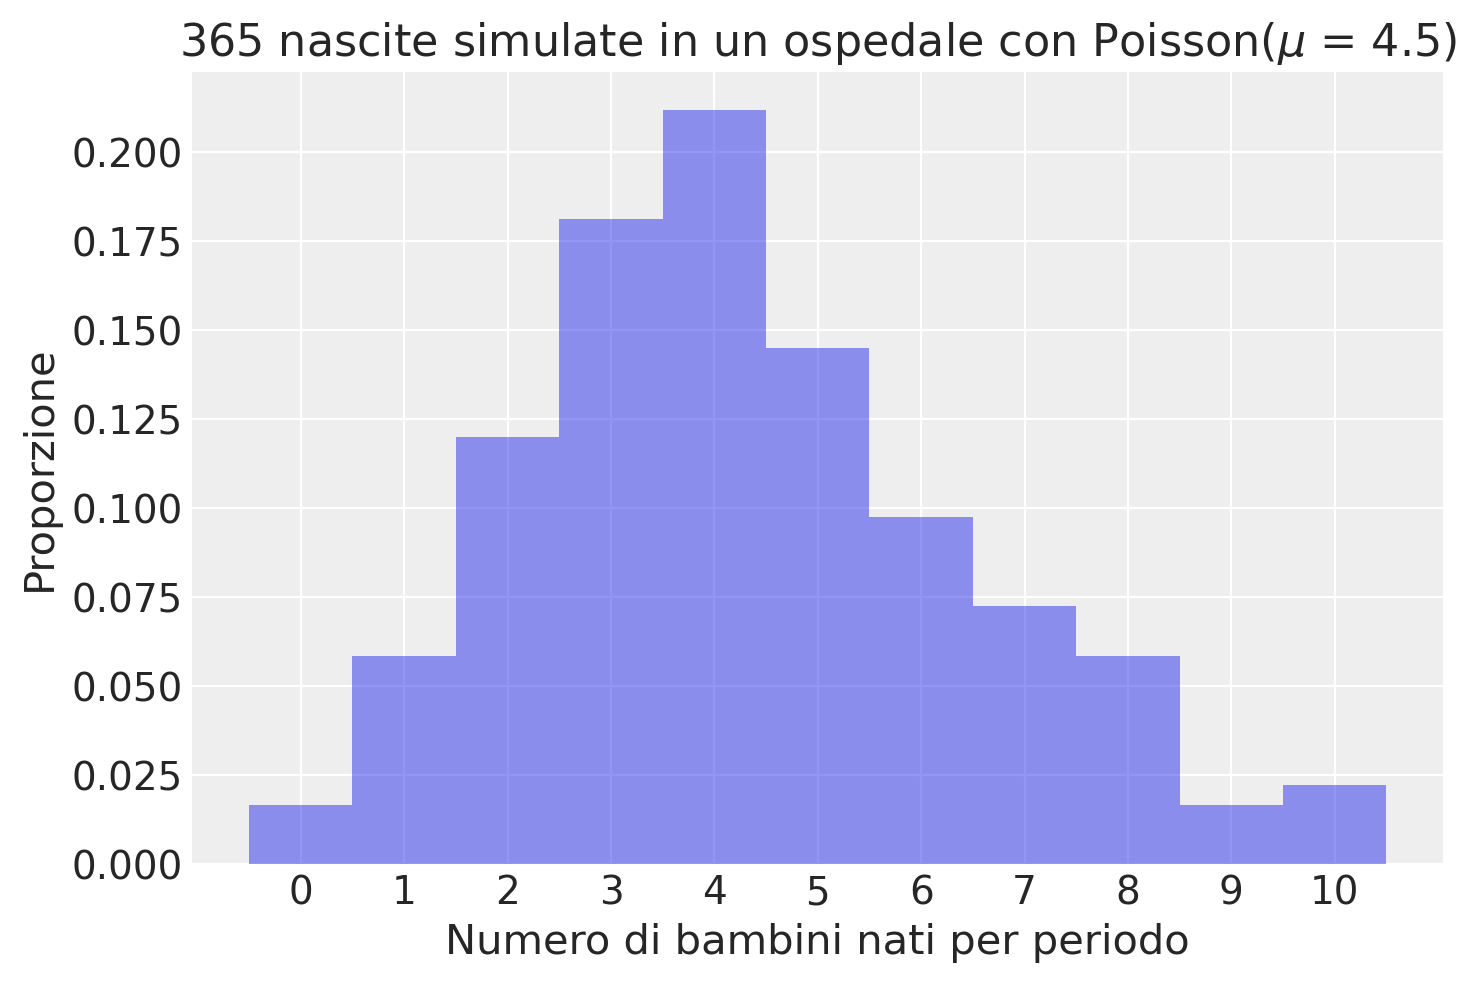

In [17]:
# Visualizziamo l'istogramma delle nascite simulate
plt.hist(simulated_births, bins=np.arange(12) - 0.5, density=True, alpha=0.5)
plt.xlabel('Numero di bambini nati per periodo')
plt.ylabel('Proporzione')
plt.title('365 nascite simulate in un ospedale con Poisson($\\mu$ = 4.5)')
plt.xticks(np.arange(11));

Calcoliamo la probabilità teorica della nascita di più di 6 bambini in un giorno.

In [29]:
prob_more_than_six = 1 - stats.poisson.cdf(6, mean_births_per_day)
print(f"La probabilità teorica di più di 6 bambini nati è: {prob_more_than_six:.4f}")

La probabilità teorica di più di 6 bambini nati è: 0.1689


Calcoliamo la proporzione corrispondente nella simulazione

In [18]:
proportion_more_than_six = np.mean(simulated_births > 6)
print(f"La proporzione di giorni con più di 6 bambini nati nella simulazione è: {proportion_more_than_six:.4f}")

La proporzione di giorni con più di 6 bambini nati nella simulazione è: 0.1836


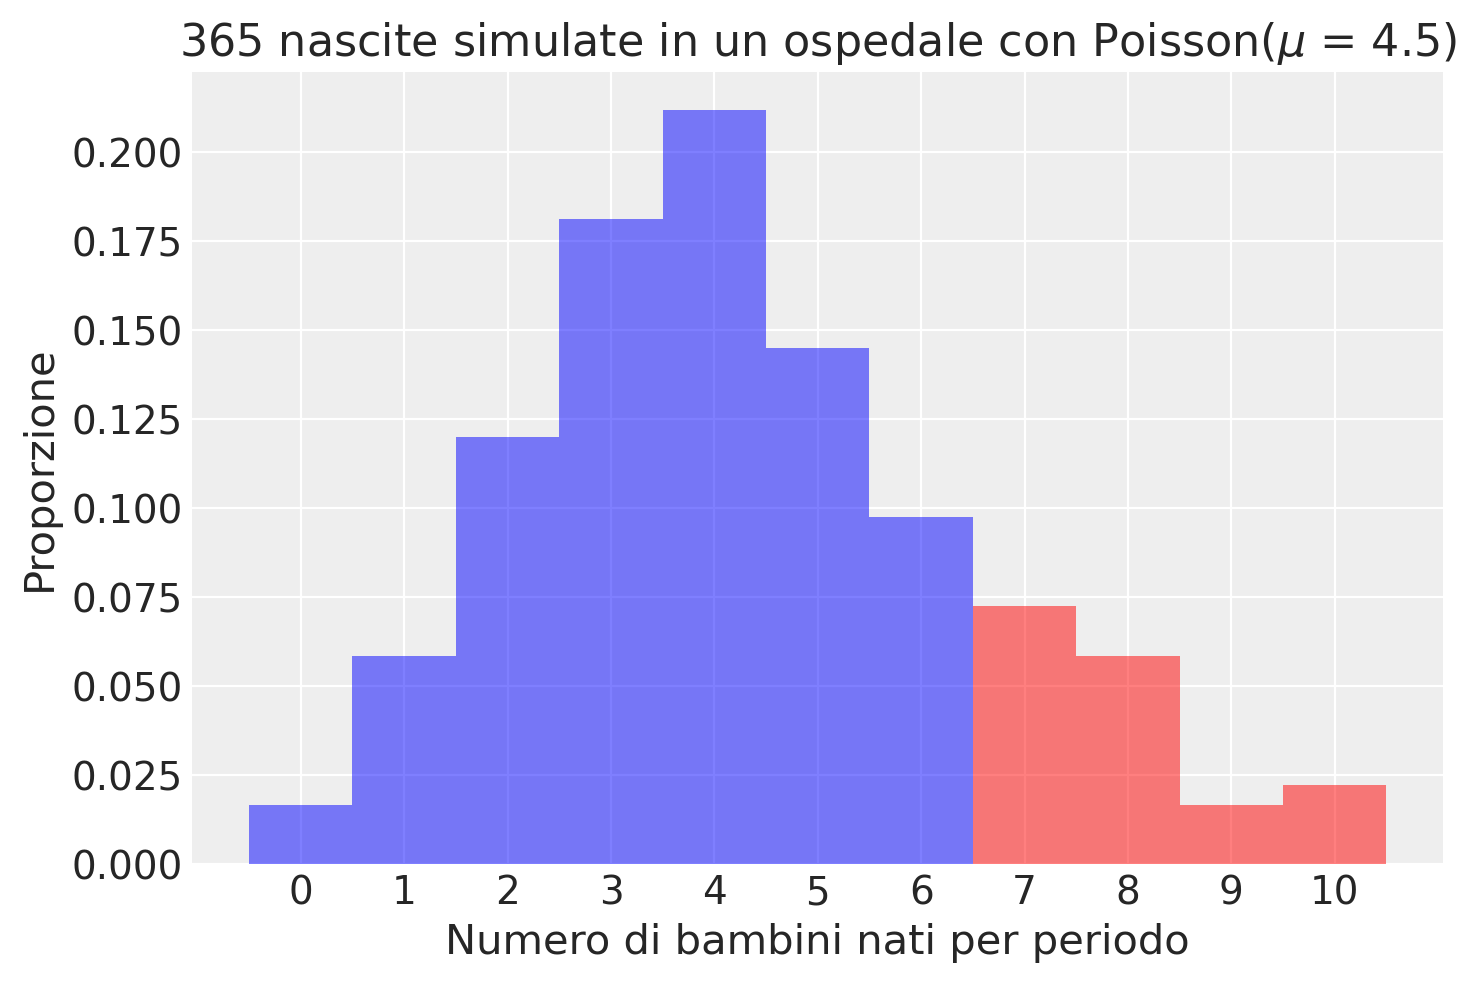

In [19]:
bins = np.arange(12) - 0.5
hist, edges = np.histogram(simulated_births, bins=bins, density=True)

# Disegna l'istogramma
for i in range(len(hist)):
    if edges[i] >= 6:
        color = 'red'  # Colore per x > 6
    else:
        color = 'blue'  # Colore per x <= 6
    plt.bar(edges[i], hist[i], width=1, align='edge', color=color, alpha=0.5)

# Imposta etichette e titolo
plt.xlabel('Numero di bambini nati per periodo')
plt.ylabel('Proporzione')
plt.title('365 nascite simulate in un ospedale con Poisson($\\mu$ = 4.5)')
_ = plt.xticks(np.arange(11))

## Distribuzione Beta-Binomiale

La distribuzione beta-binomiale rappresenta una estensione della distribuzione binomiale che tiene conto della variabilità nella probabilità di successo tra i vari tentativi. Viene descritta da tre parametri principali: $N$, $\alpha$ e $\beta$.

Nel dettaglio, la funzione di massa di probabilità per la distribuzione beta-binomiale è data da:

$$
\text{BetaBinomiale}(y | N, \alpha, \beta) = \binom{N}{y} \cdot \frac{B(y + \alpha, N - y + \beta)}{B(\alpha, \beta)},
$$ (eq-beta-binom-formula)

dove:

- $y$ indica il numero di successi osservati.
- $N$ rappresenta il numero totale di tentativi.
- $\alpha$ e $\beta$ sono i parametri della distribuzione beta, che modellano la variabilità nella probabilità di successo tra i tentativi.

La funzione $B(u, v)$, nota come funzione beta, è definita tramite l'uso della funzione gamma $\Gamma$, secondo la formula:

$$
B(u, v) = \frac{\Gamma(u) \Gamma(v)}{\Gamma(u + v)},
$$

dove la funzione gamma $\Gamma$ generalizza il concetto di fattoriale a numeri reali e complessi.

L'importanza della distribuzione beta-binomiale deriva dalla sua capacità di modellare situazioni in cui la probabilità di successo non è fissa, ma segue una distribuzione di probabilità, specificatamente una distribuzione beta. Ciò la rende particolarmente adatta per applicazioni in cui le probabilità di successo cambiano in maniera incerta da un tentativo all'altro, come può avvenire in contesti di ricerca clinica o in studi comportamentali. Rispetto alla distribuzione binomiale, che assume una probabilità di successo costante per tutti i tentativi, la beta-binomiale offre una rappresentazione più realistica e flessibile per dati empirici che presentano variabilità nelle probabilità di successo.

## Considerazioni Conclusive

In questo capitolo, abbiamo esplorato diverse distribuzioni discrete fondamentali, ciascuna con le sue specifiche applicazioni e peculiarità. Abbiamo iniziato con la distribuzione Bernoulliana, che modella esperimenti con due possibili esiti, come il lancio di una moneta. Abbiamo poi approfondito la distribuzione Binomiale, una generalizzazione della Bernoulliana, che si focalizza sul conteggio del numero di successi in un dato numero di prove indipendenti.

Abbiamo anche esaminato la distribuzione Beta-Binomiale, che estende ulteriormente il modello Binomiale incorporando la variabilità nella probabilità di successo, e la distribuzione di Poisson, utilizzata per modellare il numero di eventi che si verificano in un intervallo di tempo o spazio, quando questi eventi sono rari e indipendenti.

Infine, abbiamo discusso la distribuzione Discreta Uniforme, che attribuisce la stessa probabilità a ogni evento in un insieme finito e discreto. Questa distribuzione è particolarmente utile quando non abbiamo ragioni per assegnare probabilità diverse ai diversi esiti.

Queste distribuzioni formano il cuore dell'analisi statistica discreta e trovano applicazione in un'ampia gamma di settori. In particolare, nel contesto dell'analisi bayesiana, la comprensione della distribuzione Binomiale e Beta-Binomiale è cruciale, poiché queste distribuzioni forniscono le basi per l'aggiornamento bayesiano, un concetto chiave che sarà esplorato nei capitoli successivi.

Per coloro interessati a tecniche più avanzate, la generazione di valori casuali a partire da queste distribuzioni è trattata nell'appendice {ref}`rng-appendix`. Questa sezione fornisce strumenti e approfondimenti utili per l'applicazione pratica di questi modelli probabilistici.

In conclusione, le distribuzioni discrete forniscono strumenti essenziali e versatili per modellare e analizzare fenomeni caratterizzati da eventi distinti e quantificabili. La comprensione approfondita di queste distribuzioni è cruciale per chiunque desideri esplorare il vasto campo della probabilità e della statistica. 

## Informazioni sull'Ambiente di Sviluppo

In [20]:
%load_ext watermark
%watermark -n -u -v -iv -w -m

Last updated: Tue May 21 2024

Python implementation: CPython
Python version       : 3.12.3
IPython version      : 8.24.0

Compiler    : Clang 16.0.6 
OS          : Darwin
Release     : 23.4.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit

matplotlib: 3.8.4
seaborn   : 0.13.2
pandas    : 2.2.2
numpy     : 1.26.4
arviz     : 0.18.0
scipy     : 1.13.0

Watermark: 2.4.3

